## Exploratory Data Analysis
In this notebook, we will explore retail sales data related to 45 stores. 

1. [Introduction](#Introduction)
2. [Preprocess Data for Analytics](#Preprocess-Data-for-Analytics)
3. [Explore Indicators of Sales](#Explore-Indicators-of-Sales)
4. [Key Insights](#Key-Insights)

## Introduction

Specifically, we look into stores, their corresponding sales and other external factors, such as Consumer Price Index, Holidays and Unemployment, that could potentially impact sales. 



**Features data**: Data of Regional activity related to store.

- Store - Numeric store ID for each store 
- Date - Important dates for store
- Fuel price - Current fuel prices
- Markdowns - Markdowns are the discount you take on merchandise in your retail store from the original sale price marked.
- CPI - The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food and medical care.
- Unemployment - Current unemployment rate
- IsHoliday - Whether it's holiday or not on particular date

**Sales data**: Historical sales data covering 3 years, from 2010 to 2012. It covers sales for 143 weeks.

- Store - Numeric store ID for each store
- Dept - Numeric department ID for each department of store
- Date - Important dates for store
- Weekly Sales - Weekly sales to meassure sales performance of each store
- IsHoliday - Is it holiday or not on particular date
- Store data: Anonymized information about the 45 stores, including type and size of the store.

**Store** - Numeric store ID for each store
- Type - Type of store
- Size - Size of store

## Load Data

In [2]:
import numpy #library to compute linear algebraic equations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #is a Python statistical data visualization lib based on matplotlib
import warnings
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

#!pip install --upgrade seaborn
#!pip show seaborn

#### Import Data

In [3]:
features = pd.read_csv('../data/Features data set.csv')
sales = pd.read_csv('../data/sales data-set.csv')
stores = pd.read_csv('../data/stores data-set.csv')

In [4]:
#features.head()
features.shape #There are 8,190 store, date and holiday combinations

(8190, 12)

In [5]:
#sales.head()
sales.shape #There are 421,570 sales transactions

(421570, 5)

In [6]:
#stores.head()
stores.shape #There are 45 stores in question

(45, 3)

## Preprocess Data for Analytics

In [7]:
merged_df = features.merge(sales, on=['Store', 'Date', 'IsHoliday']).merge(stores, on=['Store'])
merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [8]:
merged_df.shape

(421570, 16)

Convert IsHoliday to numerical form; convert Date field to pandas Date format

In [9]:
merged_df['IsHoliday'] = merged_df['IsHoliday'].apply(lambda x:1 if x==True else 0)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,1,24924.50,A,151315
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2,50605.27,A,151315
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,3,13740.12,A,151315
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,4,39954.04,A,151315
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,32229.38,A,151315


In [10]:
merged_df.to_csv('retailsales.csv')

## Explore Indicators of Sales

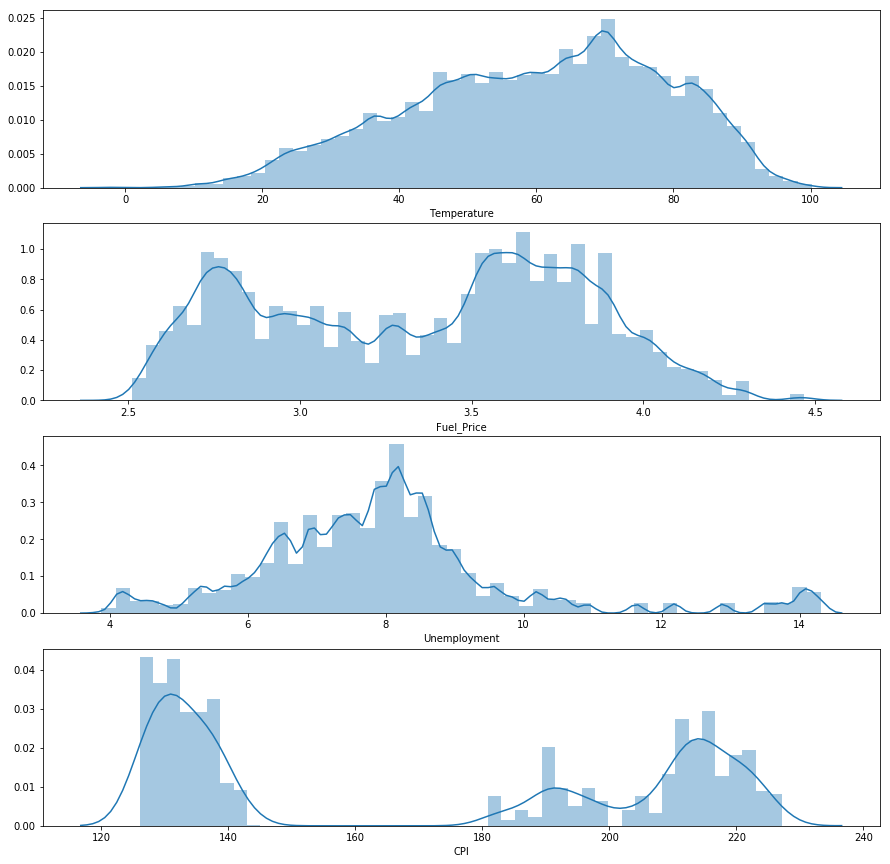

In [11]:
#Create a figure and a set of subplots
f, ax = plt.subplots(4, figsize=(15, 15)) #f=figure; ax=axes
sns.distplot(merged_df.Temperature, ax=ax[0])
sns.distplot(merged_df.Fuel_Price, ax=ax[1])
sns.distplot(merged_df.Unemployment, ax=ax[2])
sns.distplot(merged_df.CPI, ax=ax[3])

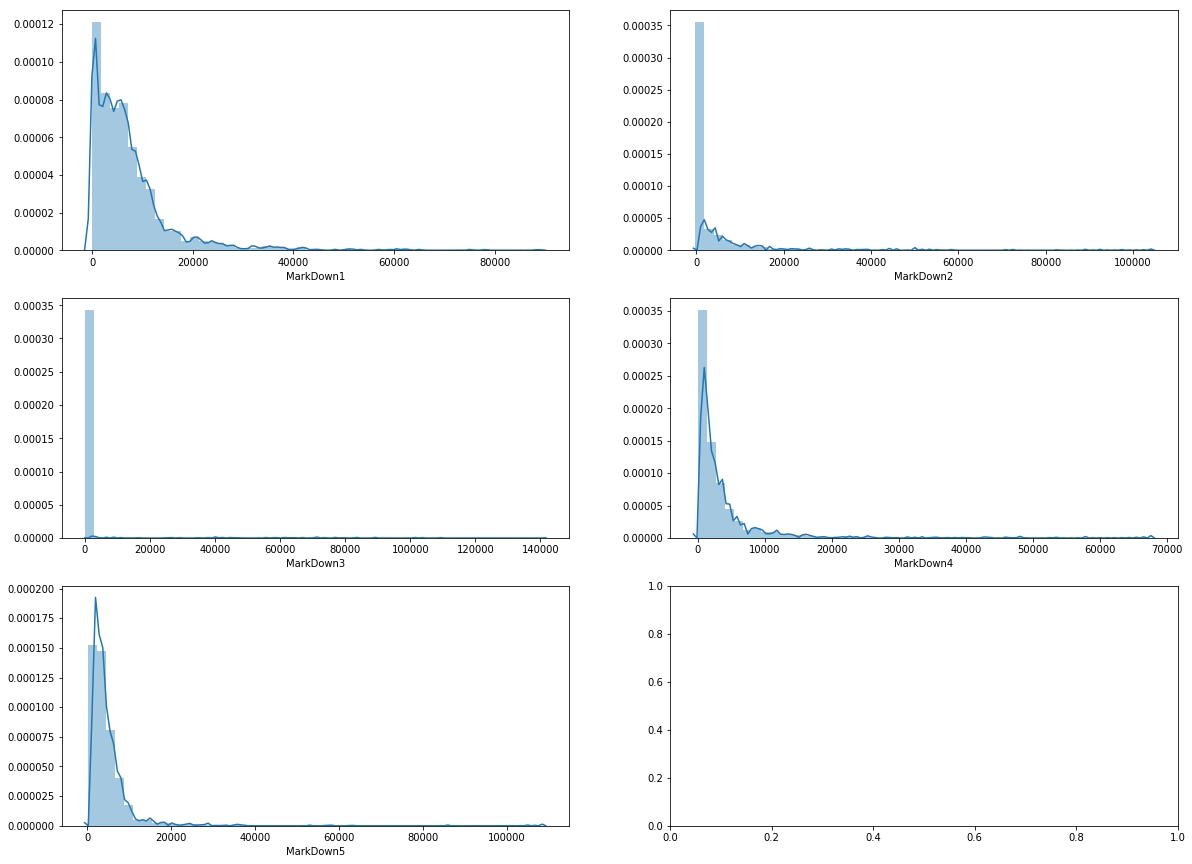

In [12]:
#Create a figure and a set of subplots
#f=figure; ax=axes
f, ax = plt.subplots(3, 2, figsize=(20, 15)) #width and height in inches
sns.distplot(merged_df.MarkDown1.dropna(), ax=ax[0, 0])
sns.distplot(merged_df.MarkDown2.dropna(), ax=ax[0, 1])
sns.distplot(merged_df.MarkDown3.dropna(), ax=ax[1, 0])
sns.distplot(merged_df.MarkDown4.dropna(), ax=ax[1, 1])
sns.distplot(merged_df.MarkDown5.dropna(), ax=ax[2, 0])


In [13]:
merged_df['MarkDown1'].describe()
#merged_df['MarkDown2'].describe()
#merged_df['MarkDown3'].describe()
#merged_df['MarkDown4'].describe()
#merged_df['MarkDown5'].describe()

count    150681.000000
mean       7246.420196
std        8291.221345
min           0.270000
25%        2240.270000
50%        5347.450000
75%        9210.900000
max       88646.760000
Name: MarkDown1, dtype: float64

#### Let's understand the relationship between different factors

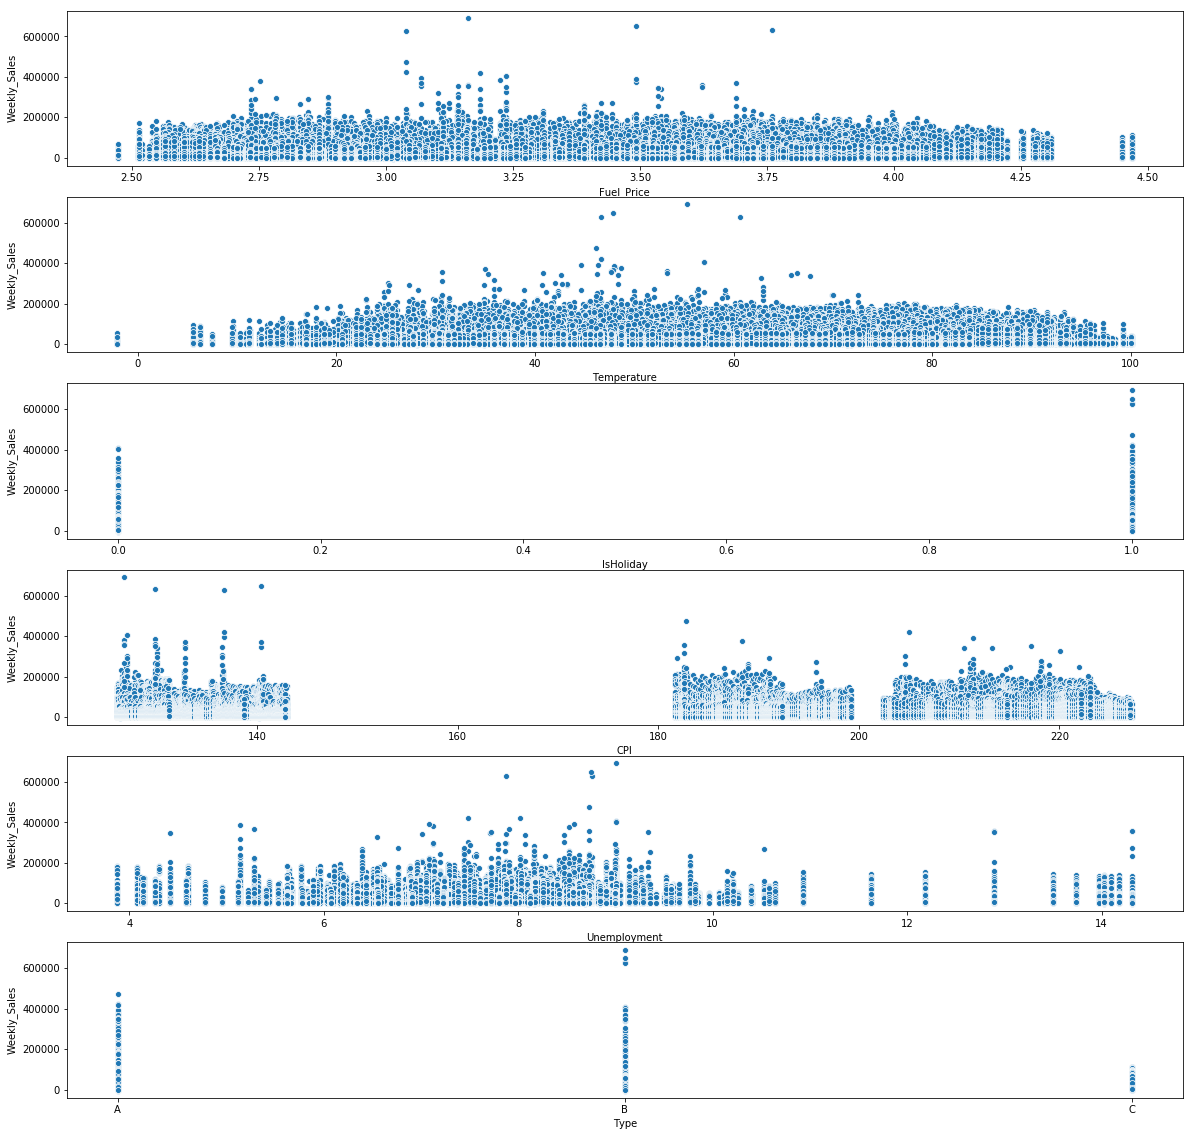

In [20]:
f, ax = plt.subplots(6, figsize=(20,20))

#Fuel price between $3.25 and $3.75 is generating higher weekly sales
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=merged_df, ax=ax[0])
#Fuel price between 50 and 65 degrees is generating higher weekly sales
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=merged_df, ax=ax[1])
#Holiday sales are higher than non-holiday sales
sns.scatterplot(x="IsHoliday", y="Weekly_Sales", data=merged_df, ax=ax[2])
#No material impact of CPI on Weekly Sales
sns.scatterplot(x="CPI", y="Weekly_Sales", data=merged_df, ax=ax[3])
#Weekly sales are higher when unemployment rate is lower (7 to 8.5)
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=merged_df, ax=ax[4])
# B type stores have higher weekly sales
sns.scatterplot(x="Type", y="Weekly_Sales", data=merged_df, ax=ax[5])

Let's understand the following questions:
- What factor or feature is heavily impacting sales?
- When are markdowns occurring (during holidays or when CPI is low)?

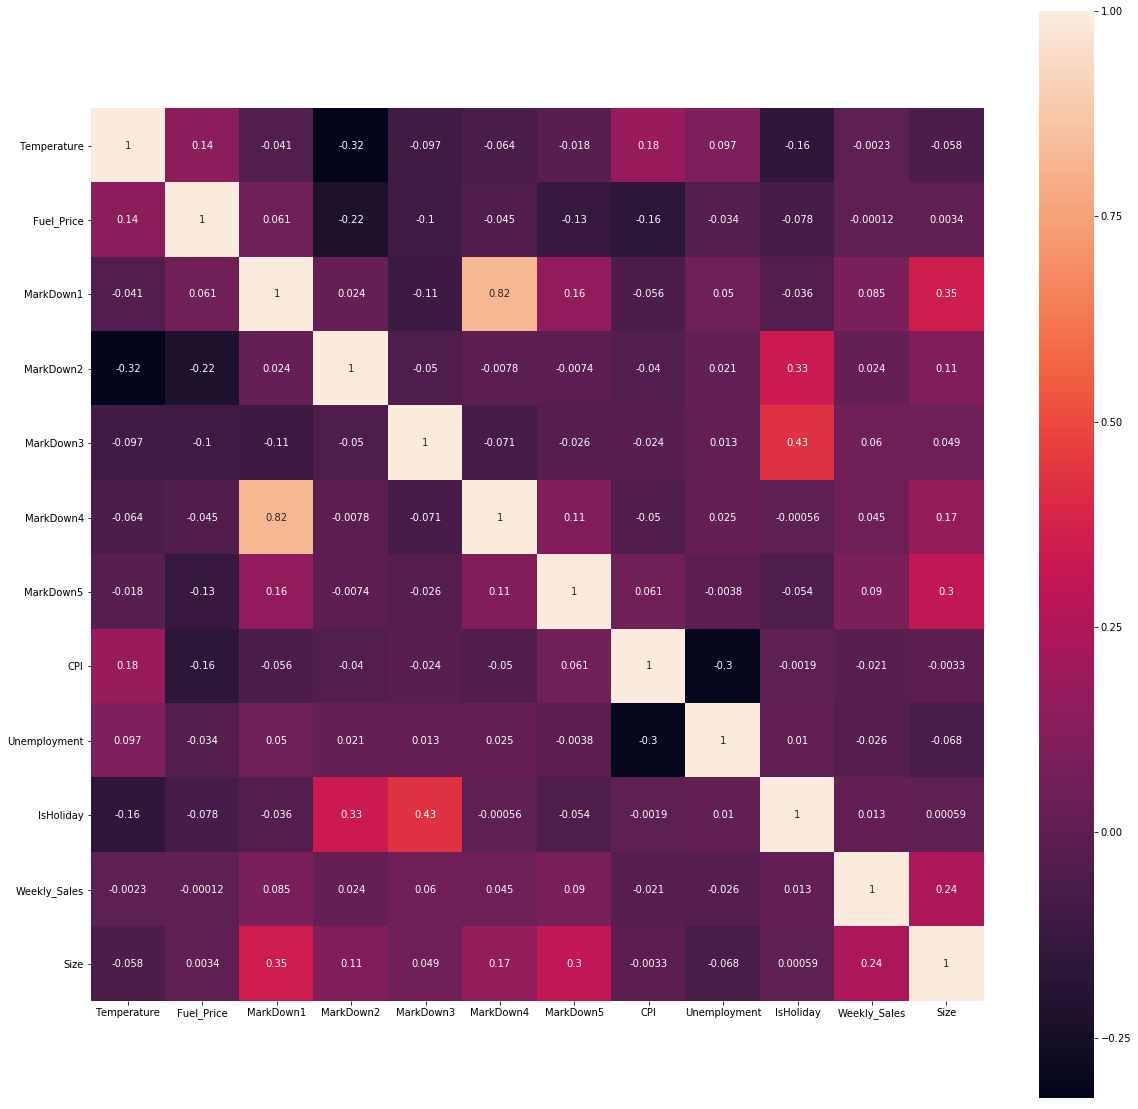

In [23]:
#Use seaborn's heatmap

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(merged_df.drop(['Store', 'Dept'], axis=1).corr(), square=True, annot=True)  #heatmap is drawn along the columns

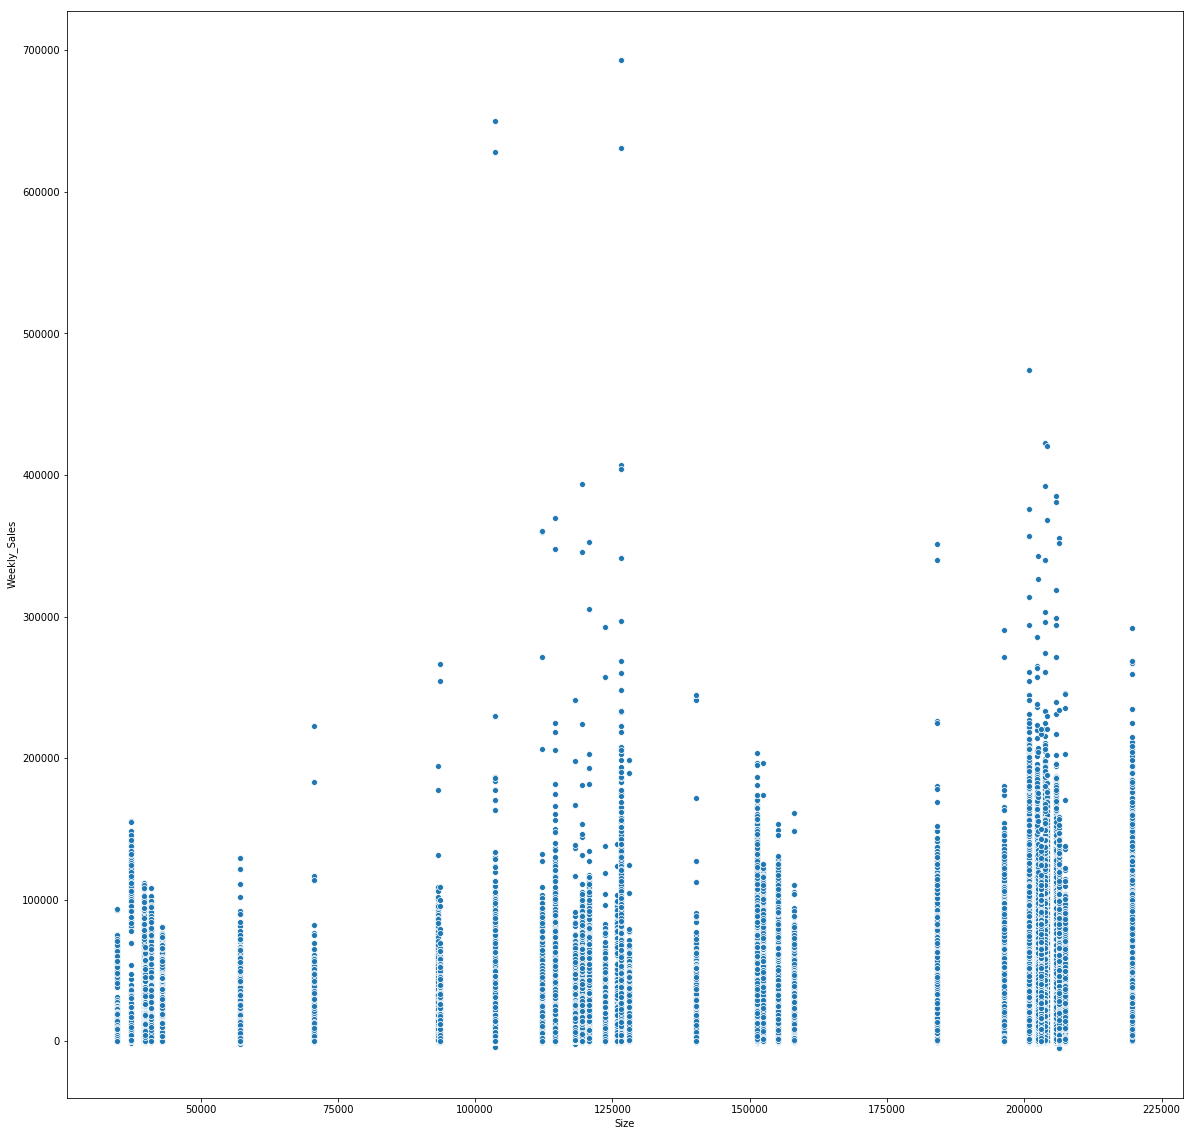

In [26]:
# We see some weak relationship between store weekly sales and store size
f, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(x="Size", y="Weekly_Sales", data=merged_df)

#### Top 10 stores

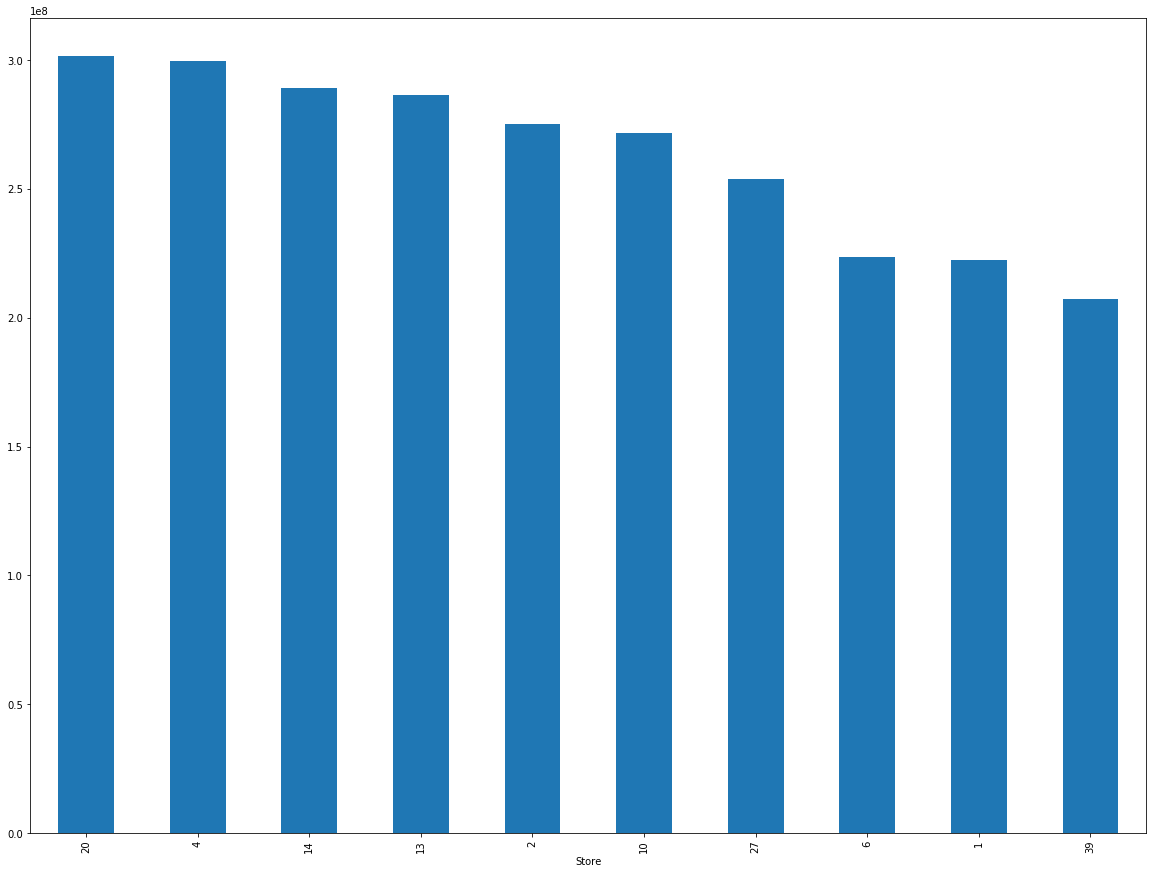

In [14]:
top10_stores = merged_df.groupby(['Store'])['Weekly_Sales'].sum()
top10_stores.sort_values(ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(20,15))
top10_stores[:10].plot.bar()

Store 20 is the best performing store. We will save this store sales for our forecasting experiment. 

In [17]:
# Save store 20 data
store20_data = merged_df.loc[merged_df['Store']==20]
store20_data.to_csv('../data/store20_sales.csv', index=False)

## Key Insights

1. Markdowns seem to happen during holidays
2. Store size is impacting sales
3. B type stores have higher weekly sales